In [10]:
!pip install yfinance

In [14]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

# Deutsche Bank (Ticker: DBK.DE)
db = yf.download("DBK.DE", start="2007-01-01", end="2024-12-31")
db.head()
# JPMorgan Chase (Ticker: JPM)
jpm = yf.download("JPM", start="2007-01-01", end="2024-12-31")
db.head()
# BNP Paribas (Ticker: BNP.PA)
bnp = yf.download("BNP.PA", start="2007-01-01", end="2024-12-31")
db.head()
# HSBC (Ticker: HSBA.L)
hsbc = yf.download("HSBA.L", start="2007-01-01", end="2024-12-31")
db.head()
# Bank ETF (e.g., KBE – SPDR S&P Bank ETF)
kbe = yf.download("KBE", start="2007-01-01", end="2024-12-31")
db.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,DBK.DE,DBK.DE,DBK.DE,DBK.DE,DBK.DE
Date,,,,,
2007-01-02,52.599869,52.656103,51.991514,51.991514,3049143
2007-01-03,52.829906,53.034395,52.518056,52.789008,3876151
2007-01-04,52.835022,52.962830,52.364694,52.630533,4617992
2007-01-05,52.170433,52.937271,52.103976,52.650985,4500098
2007-01-08,51.894375,52.231783,51.541631,52.042630,4472303


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf


tickers = ["DBK.DE", "JPM", "BNP.PA", "HSBA.L", "KBE"]
start_date = "2007-01-01"
end_date = "2024-12-31"


data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]

annual_returns = data.resample('Y').last().pct_change().mean(axis=1) * 100  # Mean return across all stocks
annual_volatility = data.pct_change().rolling(window=252).std().mean(axis=1) * np.sqrt(252) * 100  # Annualized volatility


results = pd.DataFrame({
    "Annual Return (%)": annual_returns,
    "Annual Volatility (%)": annual_volatility
}).dropna()


results = results[results.index.year < 2024]

print(results)

[*********************100%***********************]  5 of 5 completed

            Annual Return (%)  Annual Volatility (%)
Date                                                
2008-12-31         -42.689874              67.584211
2009-12-31          44.749028              67.844761
2010-12-31          -0.883332              30.610418
2012-12-31          30.355840              29.318875
2013-12-31          25.256558              21.068815
2014-12-31          -5.689319              19.216327
2015-12-31           0.227736              24.618689
2018-12-31         -26.113489              22.146714
2019-12-31          22.643752              22.581769
2020-12-31          -5.860524              53.579243
2021-12-31          30.134939              25.669503



C:\Users\akada\AppData\Local\Temp\ipykernel_37976\2192553199.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = data.resample('Y').last().pct_change().mean(axis=1) * 100  # Mean return across all stocks
C:\Users\akada\AppData\Local\Temp\ipykernel_37976\2192553199.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  annual_volatility = data.pct_change().rolling(window=252).std().mean(axis=1) * np.sqrt(252) * 100  # Annualized volatility


In [9]:
import pandas as pd
import numpy as np
import yfinance as yf


tickers = ["DBK.DE", "JPM", "BNP.PA", "HSBA.L", "KBE"]
start_date = "2007-01-01"
end_date = "2024-12-31"

data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]


annual_prices = data.resample('YE').last()  
annual_returns = annual_prices.pct_change(fill_method=None)  


annual_returns = annual_returns.T * 100
annual_returns.index.name = "Ticker"


daily_returns = data.pct_change(fill_method=None)  

annual_volatility = (
    daily_returns.groupby(daily_returns.index.year)
    .std()
    .mul(np.sqrt(252))
    .T * 100
)
annual_volatility.index.name = "Ticker"


results = pd.concat(
    {
        "Annual Return (%)": annual_returns,
        "Annual Volatility (%)": annual_volatility
    },
    axis=1
)


results = results.loc[:, results.columns.get_level_values(1).year < 2024]


results = results.sort_index(axis=1, level=1)

print(results)

[*********************100%***********************]  5 of 5 completed


AttributeError: 'Index' object has no attribute 'year'

In [19]:
import pandas as pd
import numpy as np
import yfinance as yf


tickers = ["DBK.DE", "JPM", "BNP.PA", "HSBA.L", "KBE"]
start_date = "2007-01-01"
end_date = "2024-12-31"

data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]


annual_prices = data.resample('YE').last()  # Use 'YE' instead of deprecated 'Y'
annual_returns = annual_prices.pct_change(fill_method=None)  # Disable default padding


annual_returns = annual_returns.T * 100
annual_returns.index.name = "Ticker"


daily_returns = data.pct_change(fill_method=None)  

annual_volatility = (
    daily_returns.groupby(daily_returns.index.year)
    .std()
    .mul(np.sqrt(252))
    .T * 100
)
annual_volatility.index.name = "Ticker"

results = pd.concat(
    {
        "Annual Return (%)": annual_returns,
        "Annual Volatility (%)": annual_volatility
    },
    axis=1
)

results = results.loc[:, pd.to_datetime(results.columns.get_level_values(1)).year < 2024]


results = results.sort_index(axis=1, level=1)


print(results)
results.to_csv("Ticker_Annual_Performance.csv")

[*********************100%***********************]  5 of 5 completed


         Annual Return (%)                                          \
Date   2007-12-31 00:00:00 2008-12-31 00:00:00 2009-12-31 00:00:00   
Ticker                                                               
BNP.PA                 NaN          -57.118310           88.774258   
DBK.DE                 NaN          -65.521430           79.444681   
HSBA.L                 NaN          -18.385520           22.911961   
JPM                    NaN          -25.142154           34.369377   
KBE                    NaN          -47.281956           -1.755137   

                                                                    \
Date   2010-12-31 00:00:00 2011-12-31 00:00:00 2012-12-31 00:00:00   
Ticker                                                               
BNP.PA          -10.653937          -34.806311           46.164739   
DBK.DE          -11.015525          -23.314179           14.904555   
HSBA.L           -8.110272          -24.549183           31.796652   
JPM               2

In [17]:
results.to_csv("Ticker_Annual_Performance.csv")

[*********************100%***********************]  5 of 5 completed


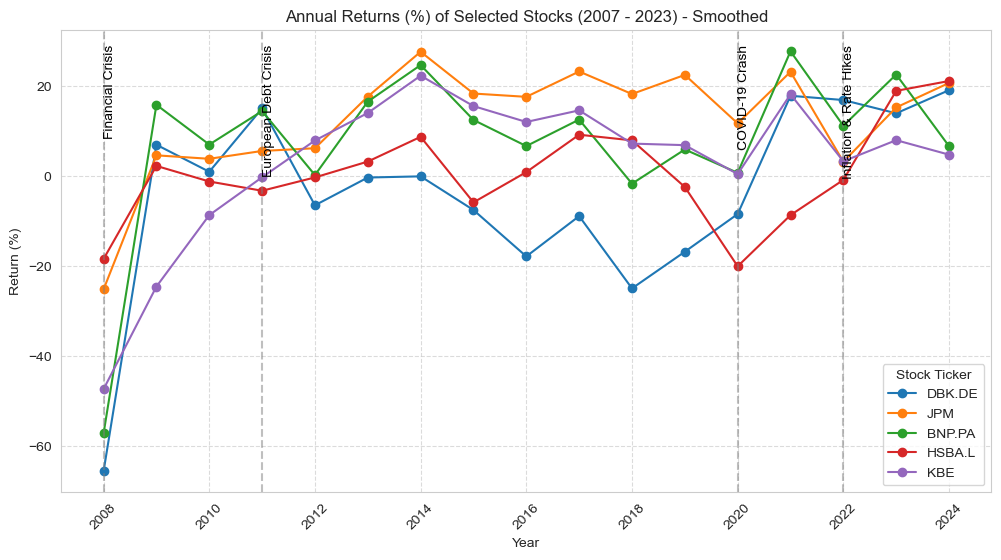

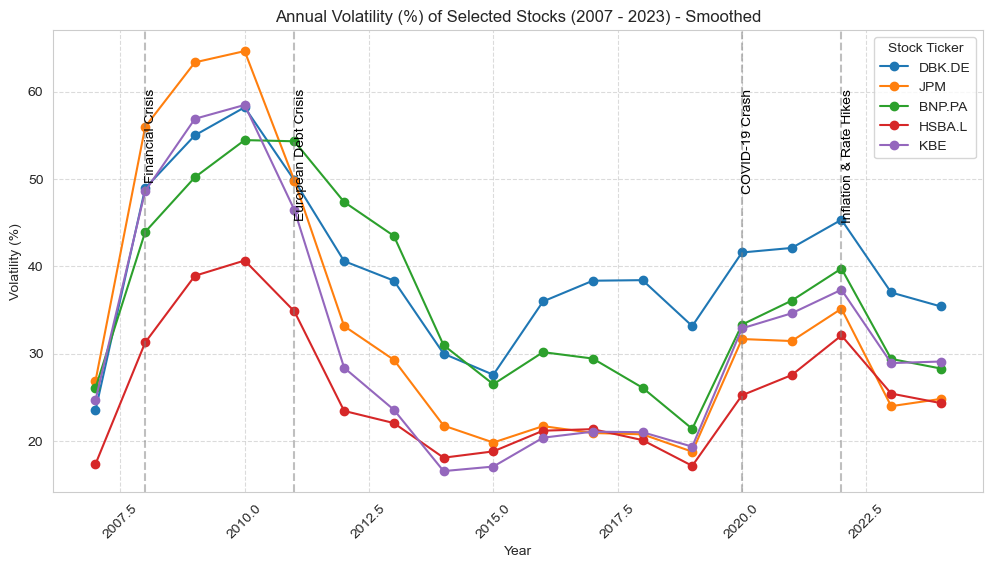

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

tickers = ["DBK.DE", "JPM", "BNP.PA", "HSBA.L", "KBE"]
start_date = "2007-01-01"
end_date = "2024-12-31"


data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]


annual_prices = data.resample('YE').last()
annual_returns = annual_prices.pct_change(fill_method=None) * 100
annual_returns.index = annual_returns.index.year  # Convert index to year
annual_returns.index.name = "Year"


annual_returns_smooth = annual_returns.rolling(window=3, min_periods=1).mean()


daily_returns = data.pct_change(fill_method=None)
annual_volatility = daily_returns.groupby(daily_returns.index.year).std().mul(np.sqrt(252)) * 100
annual_volatility.index.name = "Year"


annual_volatility_smooth = annual_volatility.rolling(window=3, min_periods=1).mean()


key_events = {
    2008: "Financial Crisis",
    2011: "European Debt Crisis",
    2020: "COVID-19 Crash",
    2022: "Inflation & Rate Hikes"
}


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
for ticker in tickers:
    if ticker in annual_returns_smooth.columns:
        plt.plot(annual_returns_smooth.index, annual_returns_smooth[ticker], marker='o', linestyle='-', label=ticker)


for year, event in key_events.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(year, plt.ylim()[1] * 0.9, event, rotation=90, verticalalignment='top', fontsize=10, color='black')

plt.title("Annual Returns (%) of Selected Stocks (2007 - 2023) - Smoothed")
plt.xlabel("Year")
plt.ylabel("Return (%)")
plt.legend(title="Stock Ticker")
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(12, 6))
for ticker in tickers:
    if ticker in annual_volatility_smooth.columns:
        plt.plot(annual_volatility_smooth.index, annual_volatility_smooth[ticker], marker='o', linestyle='-', label=ticker)


for year, event in key_events.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(year, plt.ylim()[1] * 0.9, event, rotation=90, verticalalignment='top', fontsize=10, color='black')

plt.title("Annual Volatility (%) of Selected Stocks (2007 - 2023) - Smoothed")
plt.xlabel("Year")
plt.ylabel("Volatility (%)")
plt.legend(title="Stock Ticker")
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


[*********************100%***********************]  5 of 5 completed


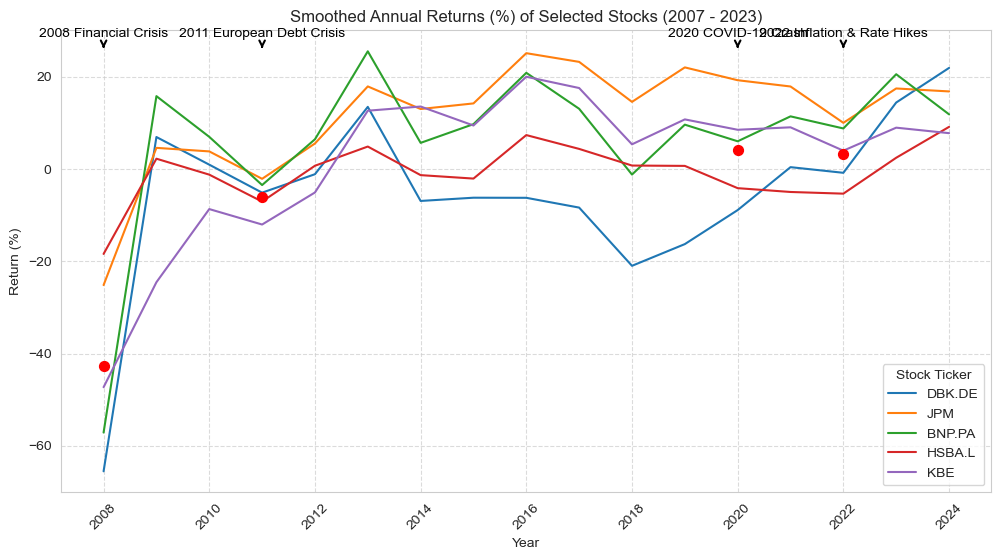

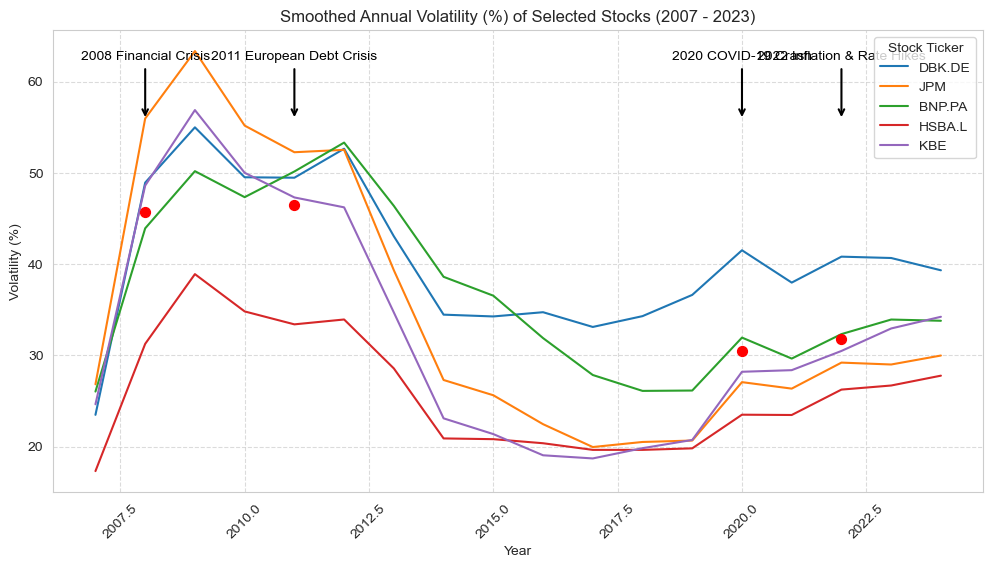

In [29]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

tickers = ["DBK.DE", "JPM", "BNP.PA", "HSBA.L", "KBE"]
start_date = "2007-01-01"
end_date = "2024-12-31"


data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]


annual_prices = data.resample('YE').last()
annual_returns = annual_prices.pct_change(fill_method=None) * 100
annual_returns.index = annual_returns.index.year  # Convert index to year
annual_returns.index.name = "Year"


annual_returns_smooth = annual_returns.rolling(window=5, min_periods=1).mean()

daily_returns = data.pct_change(fill_method=None)
annual_volatility = daily_returns.groupby(daily_returns.index.year).std().mul(np.sqrt(252)) * 100
annual_volatility.index.name = "Year"


annual_volatility_smooth = annual_volatility.rolling(window=5, min_periods=1).mean()


key_events = {
    2008: "2008 Financial Crisis",
    2011: "2011 European Debt Crisis",
    2020: "2020 COVID-19 Crash",
    2022: "2022 Inflation & Rate Hikes"
}


sns.set_style("whitegrid")

def plot_chart(data_smooth, title, ylabel):
    plt.figure(figsize=(12, 6))
    
   
    for ticker in tickers:
        if ticker in data_smooth.columns:
            plt.plot(data_smooth.index, data_smooth[ticker], linestyle='-', label=ticker)

   
    y_max = plt.ylim()[1]

    
    for year, event in key_events.items():
        if year in data_smooth.index:
            avg_value = data_smooth.loc[year].mean()  # Get avg value of all stocks at the key event year
            plt.scatter(year, avg_value, color='red', s=50, zorder=3)  # Highlight key event point
            plt.annotate(event, xy=(year, y_max * 0.85), xytext=(year, y_max * 0.95),
                         arrowprops=dict(arrowstyle="->", lw=1.5, color="black"),
                         fontsize=10, color="black", ha="center")

    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.legend(title="Stock Ticker")
    plt.xticks(rotation=45)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()


plot_chart(annual_returns_smooth, "Smoothed Annual Returns (%) of Selected Stocks (2007 - 2023)", "Return (%)")


plot_chart(annual_volatility_smooth, "Smoothed Annual Volatility (%) of Selected Stocks (2007 - 2023)", "Volatility (%)")


In [35]:
with pd.ExcelWriter("C:\\Users\\akada\\Documents\\Desertation\\stock_analysis.xlsx") as writer:
    annual_returns.to_excel(writer, sheet_name="Annual Returns")
    annual_volatility.to_excel(writer, sheet_name="Annual Volatility")


print("Data successfully saved to 'stock_analysis.xlsx'")


Data successfully saved to 'stock_analysis.xlsx'
